<a href="https://colab.research.google.com/github/HoanDiep/BT10_tuan11/blob/main/membersOfClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder = '/content/drive/My Drive/Colab Notebooks/lop/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('HOAN'):
    output = 0
  elif file.startswith('DUY'):
    output = 1
  elif file.startswith('CHI'):
    output = 2
  elif file.startswith('PHONG'):
    output = 3
  elif file.startswith('NAM'):
    output = 4
  elif file.startswith('THANG'):
    output = 5
  elif file.startswith('DONG'):
    output = 6
  else:
    continue
  photo = load_img(folder + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [3]:
!cp photos.npy "/content/drive/My Drive/Colab Notebooks/dataset_members"
!cp labels.npy "/content/drive/My Drive/Colab Notebooks/dataset_members"

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/dataset_members/photos.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/dataset_members/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1)

In [5]:
x_train.shape


(422, 30, 40, 3)

In [6]:
x_test.shape

(47, 30, 40, 3)

In [7]:
x_train = x_train.reshape(422, 30, 40, 3)
x_test = x_test.reshape(47, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
labels_members = ['HOAN','DUY','CHI','PHONG','NAM','THANG','DONG']

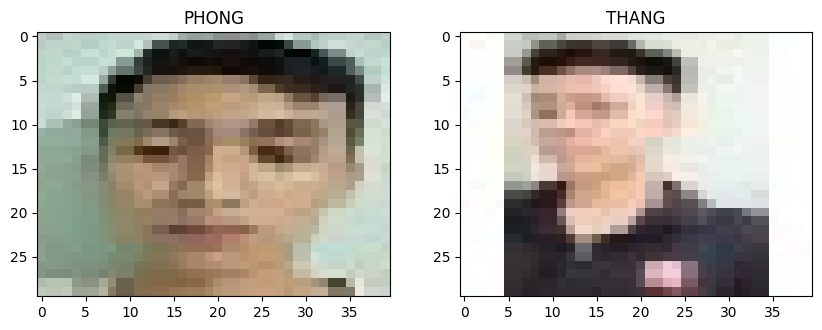

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("{}".format(labels_members[y_train[0]]))
plt.subplot(122)
plt.imshow(x_test[20], cmap='gray')
plt.title("{}".format(labels_members[y_test[20]]))
plt.show()

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(64, activation='linear'))

model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 19, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 19, 64)        0         
                                                        

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 21ms/step - loss: 1.9186 - accuracy: 0.2370
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 1.4527 - accuracy: 0.4526
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6048 - accuracy: 0.7725
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9431
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.9692
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9858
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9834
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9976
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9929
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9953
Epoch 1

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

2/2 [==============================] - 0s 139ms/step - loss: 2.0244e-05 - accuracy: 1.0000
test_acc: 1.0
test_loss: 2.0243938706698827e-05


In [15]:
model.save('/content/drive/My Drive/Colab Notebooks/members.h5')

1/1 [==============================] - 0s 174ms/step
DONG


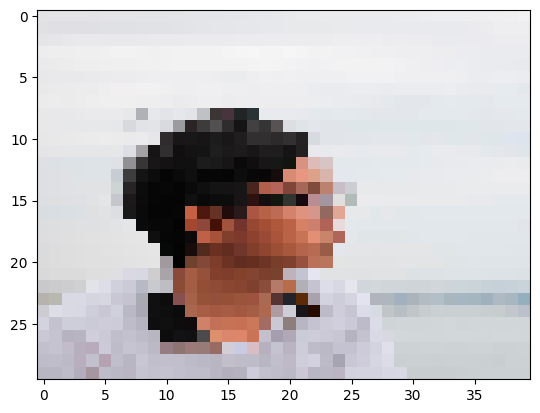

In [17]:
img = load_img('/content/drive/My Drive/Colab Notebooks/dong.jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels_members[np.argmax(model.predict(img))]
print(result)
     